In [ ]:
################
#achieving Media data#

In [205]:
def media_feature(df):
    subreddits = ['CoronavirusUS','CoronavirusUK','CoronavirusNewYork','CoronavirusCA','Talk about Coronavirus in Michigan ','CoronaVirusPA','CoronavirusIllinois']
    pre = []
    concerns = []
    total = []
    for i in subreddits:
        pre.append(0)
        concerns.append(0)
        total.append(0)
    for i,row in df.iterrows():
        k = subreddits.index(row["subreddit"])
        if(row["precaution"] == 1):
            pre[k] += 1
        if(row["concerns"] == 1):
            concerns[k] += 1
        total[k] += 1
    return pre,concerns,total

In [221]:
files = []
for i in range(14,29):
    #if i < 10 do str(str(0)+str(i))#
    if i == 21:
        continue
    name = "labeled2020-04-"+str(i)
    files.append(name)
files.append("labeled2020-04-30")
files.append("labeled2020-05-01")
files.append("labeled2020-05-02")
files.append("labeled2020-05-03")

dflist = []
datelist = []
for i in files:
    df = pd.read_csv(i)
    dflist.append(df)
    datelist.append(i[7:17])

In [222]:
subreddits = ['CoronavirusUS','CoronavirusUK','CoronavirusNewYork','CoronavirusCA','Talk about Coronavirus in Michigan ','CoronaVirusPA','CoronavirusIllinois']

In [223]:
P = []
C = []
for i in subreddits:
    P.append([])
    C.append([])
for df in dflist:
    pre,concerns,non = media_feature(df)
    for i in range(0,len(pre)):
        P[i].append(float(pre[i]+1)/float(non[i]+1))
        C[i].append(float(concerns[i]+1)/float(non[i]+1))
#Missing data, replaced with mean#
k1 = 6
k2 = 13+2
datelist.insert(k1,"2020-4-21")
datelist.insert(k2,"2020-4-29")
P.insert(k1,sum(P[j])/len(P[j]))
P.insert(k2,sum(P[j])/len(P[j]))
C.insert(k1,sum(C[j])/len(C[j]))
C.insert(k2,sum(C[j])/len(C[j]))

In [233]:
#US#
P[0]

[0.27450980392156865,
 0.21568627450980393,
 0.29411764705882354,
 0.23529411764705882,
 0.37254901960784315,
 0.29411764705882354,
 0.21568627450980393,
 0.39215686274509803,
 0.27848101265822783,
 0.37254901960784315,
 0.37254901960784315,
 0.26732673267326734,
 0.4117647058823529,
 0.37254901960784315,
 0.39215686274509803,
 0.43137254901960786,
 0.39215686274509803,
 0.4117647058823529]

In [ ]:
###############

In [ ]:
#SIR#

In [54]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [169]:
def SIR(N,I0,R0, beta, gamma):
    S0 = N - I0 - R0
    t = np.linspace(0, 19, 19)
    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    return S,I,R,t

In [170]:
def plotSIR(S,I,R,Ih,t):
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow=True)
    #ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, Ih/1000, 'b', label='Observed Infected')
    #ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show()
    return plt

In [171]:
file = './Medical_Data/time_series_covid19_confirmed_global.csv'
observed_df = pd.read_csv(file)
Ih = []
for i,row in observed_df.iterrows():
    if (row['Country/Region'] == 'US'):
        for j in range(13,30):
            name = '4/'+str(j)+'/20'
            Ih.append(observed_df[name][i])
        for j in range(1,3):
            name = '5/'+str(j)+'/20'
            Ih.append(observed_df[name][i])

In [172]:
tc = t.copy()
for i in range(0,len(tc)):
    if i > 18:
        tc[i] = 0
        continue
    tc[i] = Ih[i]
Ih_t = tc

In [173]:
file = './Medical_Data/time_series_covid19_confirmed_global.csv'
observed_df = pd.read_csv(file)
for i,row in observed_df.iterrows():
    if (row['Country/Region'] == 'US'):
            name = '4/13/20'
            I0 = observed_df[name][i]

In [196]:
S,I,R,t = SIR(328200000,580619,43482,0.24,0.2)

In [ ]:
#use the SIR model to predict#
#graph the actual observed medical data#
#try to make the SIR model fit the medical data#

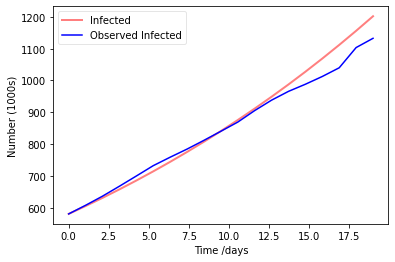

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [197]:
plotSIR(S,I,R,Ih_t,t)

In [ ]:
#SIR with media function#

In [231]:
def media_func(I,dIdt,a,b):
    import math
    power = a*I+b*dIdt
    if (power>0):
        return math.exp(-power)
    else:
        return 1

In [278]:
def deriv_m(y, t, N, beta, gamma,a,b):
    S, I, R = y
    
    dIdt = media_func(I,-12000,a,b) * beta * S * I / N - gamma * I
    dSdt = -beta * S * I * (-media_func(I,dIdt,a,b)) / N
    dRdt = gamma * I
    print(dIdt)
    return dSdt, dIdt, dRdt

In [279]:
def SIR_m(N,I0,R0, beta, gamma,a,b):
    S0 = N - I0 - R0
    t = np.linspace(0, 19, 19)
    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv_m, y0, t, args=(N, beta, gamma,a,b))
    S, I, R = ret.T
    return S,I,R,t

In [280]:
S,I,R,t = SIR_m(328200000,580619,43482,0.24,0.2,0.000012,0.00009)

-115737.96789974449
-115736.95093618242
-115736.95094511827
-115735.93398950637
-115735.93399844215
-115537.00929615766
-115537.00916522482
-115338.3885775269
-115338.38831576082
-115140.07103028806
-115140.07076905787
-114036.0909163762
-114036.08761878558
-114414.24645694601
-114414.24501278438
-114994.58009445474
-114994.58003591422
-114849.2522680034
-114849.25232689416
-114704.08738468896
-114704.08738482455
-114559.08494102079
-114559.0849411624
-114269.56647508306
-114269.5664757625
-113980.6947876305
-113980.69478728641
-113692.46773759945
-113692.46773725442
-113404.88319192152
-113404.883191917
-113117.93902245307
-113117.93902244838
-110283.25324288315
-110283.25322930259
-107510.30120696263
-107510.30116592802
-104797.04114150676
-104797.04114528706
-102141.4898743882
-102141.48984314212
-99541.7270268803
-99541.72698427782
-96995.90020605283
-96995.90016201367
-90582.60217602746
-90582.60077733379
-84496.83758851547
-84496.83299136788
-78713.54871060517
-78713.55353598068


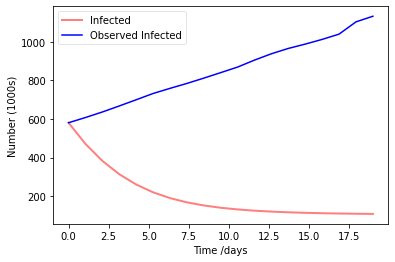

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [281]:
plotSIR(S,I,R,Ih_t,t)